In [1]:
# Set project root
import os
os.chdir('./..')

# Setting locale for pretty printing
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [2]:
# Importing something that can be useful, I hope
from Utils.Data.Data import get_feature, get_dataset, get_dictionary
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 110
import pandas as pd
import numpy as np

# Train dataset analysis

In [3]:
columns = [
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_positive",
    "tweet_feature_engagement_is_negative"
]
dataset_id = "train"

In [4]:
# Load the data
dataframe = get_dataset(columns, dataset_id)
dataframe

,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_positive,tweet_feature_engagement_is_negative
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,True,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
148075233,False,False,False,False,False,True
148075234,False,False,False,False,False,True
148075235,True,True,False,False,True,False
148075236,True,False,False,False,True,False


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148075238 entries, 0 to 148075237
Data columns (total 6 columns):
 #   Column                                Dtype
---  ------                                -----
 0   tweet_feature_engagement_is_like      bool 
 1   tweet_feature_engagement_is_retweet   bool 
 2   tweet_feature_engagement_is_reply     bool 
 3   tweet_feature_engagement_is_comment   bool 
 4   tweet_feature_engagement_is_positive  bool 
 5   tweet_feature_engagement_is_negative  bool 
dtypes: bool(6)
memory usage: 847.3 MB


## Number of a certain type of engagement with respect to the total amount of engagements

I don't know how to plot a pie chart, so I hope you can still enjoy some percentages

In [6]:
# Storing the total amount of engagements
n_engagements = len(dataframe['tweet_feature_engagement_is_like'])
n_engagements

148075238

In [7]:
n_positive_engagements = dataframe['tweet_feature_engagement_is_positive'].sum()
n_negative_engagements = dataframe['tweet_feature_engagement_is_negative'].sum()
n_like_engagements = dataframe['tweet_feature_engagement_is_like'].sum()
n_retweet_engagements = dataframe['tweet_feature_engagement_is_retweet'].sum()
n_reply_engagements = dataframe['tweet_feature_engagement_is_reply'].sum()
n_comment_engagements = dataframe['tweet_feature_engagement_is_comment'].sum()

Positive engagements are: 75,649,149 (0.5109%)
Negative engagements are: 74,825,515 (0.5053%)
Like engagements are: 65,031,581 (0.4392%)
Retweet engagements are: 16,745,818 (0.1131%)
Reply engagements are: 4,064,104 (0.0274%)
Comment engagements are: 1,153,450 (0.0078%)


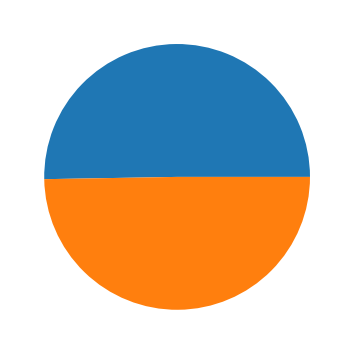

In [8]:
print(f"Positive engagements are: {int(n_positive_engagements):n} ({int(n_positive_engagements)/n_engagements:.4f}%)")
print(f"Negative engagements are: {int(n_negative_engagements):n} ({int(n_negative_engagements)/n_engagements:.4f}%)")
print(f"Like engagements are: {int(n_like_engagements):n} ({int(n_like_engagements)/n_engagements:.4f}%)")
print(f"Retweet engagements are: {int(n_retweet_engagements):n} ({int(n_retweet_engagements)/n_engagements:.4f}%)")
print(f"Reply engagements are: {int(n_reply_engagements):n} ({int(n_reply_engagements)/n_engagements:.4f}%)")
print(f"Comment engagements are: {int(n_comment_engagements):n} ({int(n_comment_engagements)/n_engagements:.4f}%)")
plt.pie([n_positive_engagements, n_negative_engagements])
plt.show()

## Number of rows that involves more than one engagement

In [9]:
dataframe['number_of_engagements'] = dataframe[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
]].sum(axis=1).astype(np.uint8)
dataframe['number_of_engagements']

0            0
1            0
2            1
3            0
4            0
            ..
148075233    0
148075234    0
148075235    2
148075236    1
148075237    0
Name: number_of_engagements, Length: 148075238, dtype: uint8

Min number of different engagement types in a row: 0
Max number of different engagement types in a row: 4
Mean number of different engagement types in a row: 0.5875


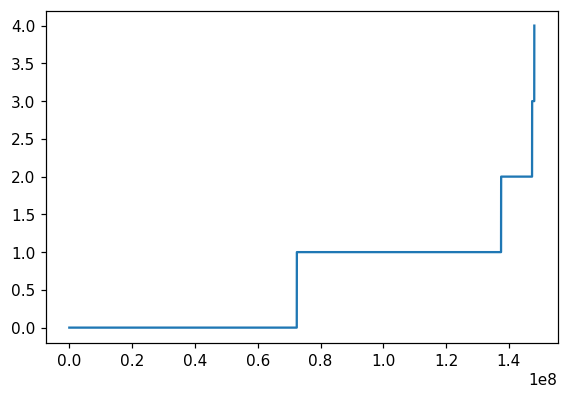

In [10]:
print(f"Min number of different engagement types in a row: {dataframe['number_of_engagements'].min()}")
print(f"Max number of different engagement types in a row: {dataframe['number_of_engagements'].max()}")
print(f"Mean number of different engagement types in a row: {dataframe['number_of_engagements'].mean():.4f}")

# Plotting the result
plt.clf()
plt.plot(dataframe['number_of_engagements'].sort_values().values)
plt.show()

In [11]:
engagements_value_count = dataframe['number_of_engagements'].value_counts()

Rows with 0 engagements are 72,426,089 (0.4891%)
Rows with 1 engagements are 65,052,960 (0.4393%)
Rows with 2 engagements are 9,873,633 (0.0667%)
Rows with 3 engagements are 695,497 (0.0047%)
Rows with 4 engagements are 27,059 (0.0002%)


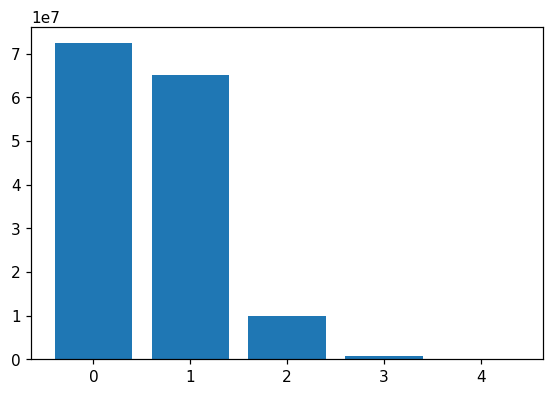

In [12]:
for i in range(5):
    print(f"Rows with {i} engagements are {engagements_value_count[i]:n} ({engagements_value_count[i]/n_engagements:.4f}%)")
# Plotting the result
plt.bar(engagements_value_count.index, engagements_value_count.values)
plt.show()

## Let's do the same thing for each language

In [13]:
dataframe['language'] = get_feature('mapped_feature_tweet_language', dataset_id)
dataframe

,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_positive,tweet_feature_engagement_is_negative,number_of_engagements,language
0,False,False,False,False,False,True,0,0
1,False,False,False,False,False,True,0,1
2,True,False,False,False,True,False,1,0
3,False,False,False,False,False,True,0,0
4,False,False,False,False,False,True,0,0
...,...,...,...,...,...,...,...,...
148075233,False,False,False,False,False,True,0,3
148075234,False,False,False,False,False,True,0,3
148075235,True,True,False,False,True,False,2,3
148075236,True,False,False,False,True,False,1,23


In [14]:
language_dictionary = get_dictionary('mapping_language_id_direct')
language_dictionary.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [15]:
# Declaring some auxiliary structures
n_engagements_arr = np.empty(len(language_dictionary.values()))
n_positive_engagements_arr = np.empty(len(language_dictionary.values()))
n_negative_engagements_arr = np.empty(len(language_dictionary.values()))
n_like_engagements_arr = np.empty(len(language_dictionary.values()))
n_retweet_engagements_arr = np.empty(len(language_dictionary.values()))
n_reply_engagements_arr = np.empty(len(language_dictionary.values()))
n_comment_engagements_arr = np.empty(len(language_dictionary.values()))

In [16]:
for language_id in language_dictionary.values():
    # To short things
    i = language_id
    sub_dataframe = dataframe[dataframe['language'] == language_id]
    # Printing the info computated
    n_engagements_arr[i] = len(sub_dataframe)
    n_positive_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_positive'].sum()
    n_negative_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_negative'].sum()
    n_like_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_like'].sum()
    n_retweet_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_retweet'].sum()
    n_reply_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_reply'].sum()
    n_comment_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_comment'].sum()

#### Language popularity (X = language_id | Y = number of rows with a tweet in that language)

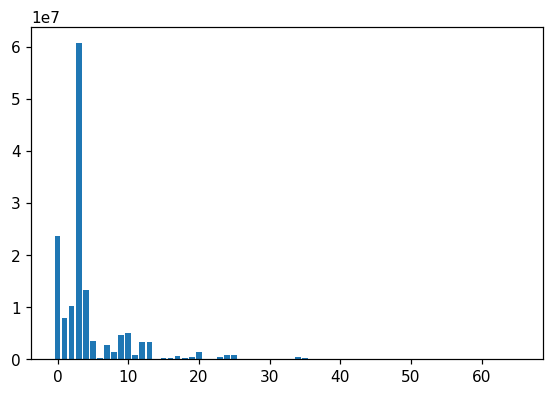

In [17]:
plt.bar(language_dictionary.values(), n_engagements_arr)
plt.show()

<BarContainer object of 66 artists>

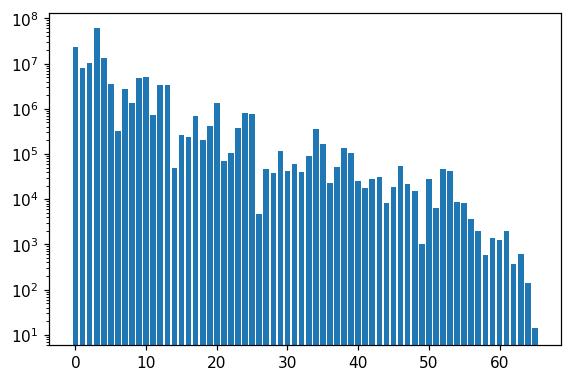

In [18]:
# In logaritmic scale
plt.yscale('log')
plt.bar(language_dictionary.values(), n_engagements_arr)

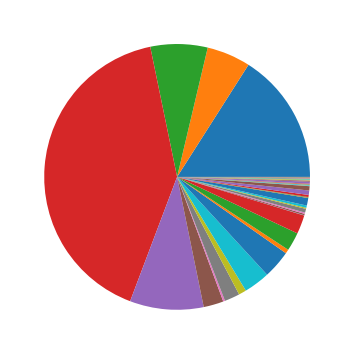

In [19]:
plt.pie(n_engagements_arr)
plt.show()

In [20]:
for i, count in enumerate(n_engagements_arr):
    print(f"Language {i} has {int(count):n} rows")

Language 0 has 23,652,265 rows
Language 1 has 7,884,887 rows
Language 2 has 10,280,788 rows
Language 3 has 60,722,973 rows
Language 4 has 13,273,364 rows
Language 5 has 3,605,235 rows
Language 6 has 328,193 rows
Language 7 has 2,754,976 rows
Language 8 has 1,368,133 rows
Language 9 has 4,716,522 rows
Language 10 has 5,072,653 rows
Language 11 has 735,812 rows
Language 12 has 3,337,790 rows
Language 13 has 3,387,184 rows
Language 14 has 48,997 rows
Language 15 has 256,708 rows
Language 16 has 235,411 rows
Language 17 has 677,094 rows
Language 18 has 203,131 rows
Language 19 has 406,106 rows
Language 20 has 1,361,237 rows
Language 21 has 69,185 rows
Language 22 has 105,288 rows
Language 23 has 375,828 rows
Language 24 has 792,721 rows
Language 25 has 770,466 rows
Language 26 has 4,666 rows
Language 27 has 46,439 rows
Language 28 has 38,257 rows
Language 29 has 117,667 rows
Language 30 has 41,328 rows
Language 31 has 61,251 rows
Language 32 has 40,079 rows
Language 33 has 92,395 rows
Lang

## Percentage of engagement type for each language (red line is the percentage computed using all languages)

POSITIVE


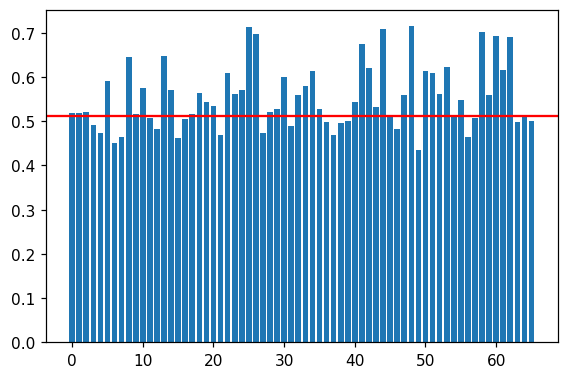

In [21]:
# Positive
print("POSITIVE")
percentage = n_positive_engagements_arr / n_engagements_arr
plt.bar(language_dictionary.values(), percentage)
plt.axhline(n_positive_engagements/n_engagements, color="red")
plt.show()

NEGATIVE


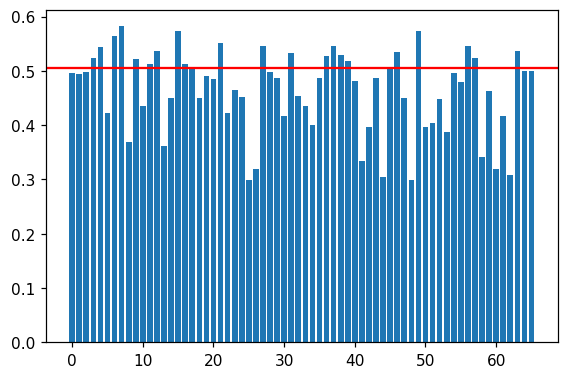

In [22]:
# Negative
print("NEGATIVE")
percentage = n_negative_engagements_arr / n_engagements_arr
plt.bar(language_dictionary.values(), percentage)
plt.axhline(n_negative_engagements/n_engagements, color="red")
plt.show()

LIKE


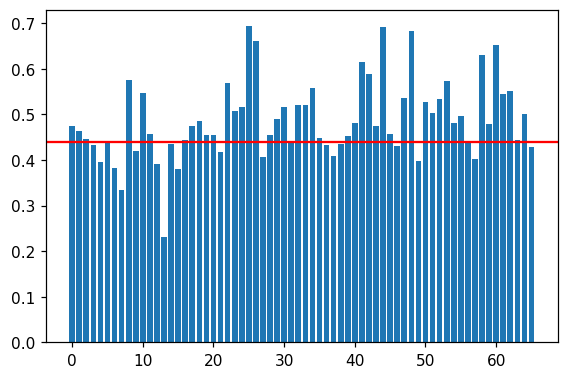

In [23]:
# Like
print("LIKE")
percentage = n_like_engagements_arr / n_engagements_arr
plt.bar(language_dictionary.values(), percentage)
plt.axhline(n_like_engagements/n_engagements, color="red")
plt.show()

RETWEET


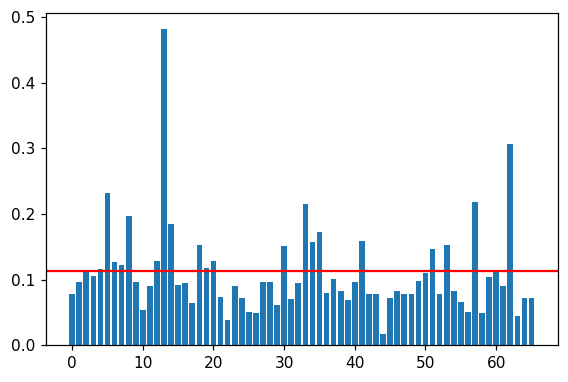

In [24]:
# Retweet
print("RETWEET")
percentage = n_retweet_engagements_arr / n_engagements_arr
plt.bar(language_dictionary.values(), percentage)
plt.axhline(n_retweet_engagements/n_engagements, color="red")
plt.show()

REPLY


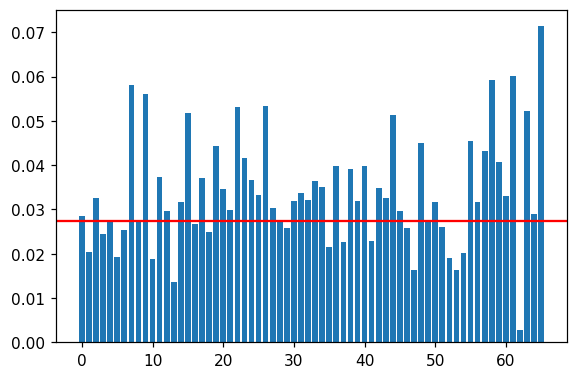

In [25]:
# Reply
print("REPLY")
percentage = n_reply_engagements_arr / n_engagements_arr
plt.bar(language_dictionary.values(), percentage)
plt.axhline(n_reply_engagements/n_engagements, color="red")
plt.show()

COMMENT


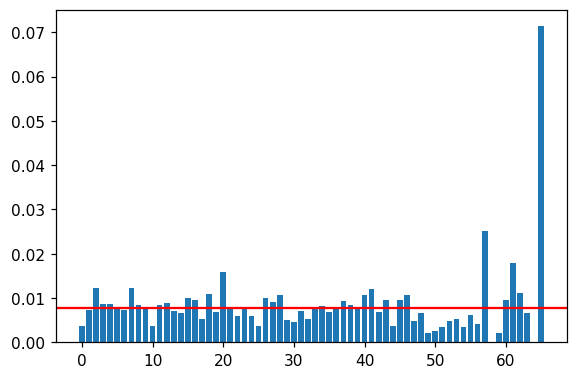

In [26]:
# Comment
print("COMMENT")
percentage = n_comment_engagements_arr / n_engagements_arr
plt.bar(language_dictionary.values(), percentage)
plt.axhline(n_comment_engagements/n_engagements, color="red")
plt.show()

## Let's do the same thing for each the tweet type

In [27]:
# I included Reply because it's listed on https://recsys-twitter.com/
t_types = ['TopLevel', 'Reply', 'Retweet', 'Quote']
t_types_dict = {'TopLevel': 0, 'Reply': 1, 'Retweet': 2, 'Quote':3}
dataframe['tweet_type'] = get_feature('raw_feature_tweet_type', dataset_id).replace(t_types_dict)
dataframe

,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_positive,tweet_feature_engagement_is_negative,number_of_engagements,language,tweet_type
0,False,False,False,False,False,True,0,0,0
1,False,False,False,False,False,True,0,1,0
2,True,False,False,False,True,False,1,0,0
3,False,False,False,False,False,True,0,0,0
4,False,False,False,False,False,True,0,0,0
...,...,...,...,...,...,...,...,...,...
148075233,False,False,False,False,False,True,0,3,2
148075234,False,False,False,False,False,True,0,3,2
148075235,True,True,False,False,True,False,2,3,0
148075236,True,False,False,False,True,False,1,23,0


In [28]:
# Declaring some auxiliary structures
n_engagements_arr = np.empty(len(t_types))
n_positive_engagements_arr = np.empty(len(t_types))
n_negative_engagements_arr = np.empty(len(t_types))
n_like_engagements_arr = np.empty(len(t_types))
n_retweet_engagements_arr = np.empty(len(t_types))
n_reply_engagements_arr = np.empty(len(t_types))
n_comment_engagements_arr = np.empty(len(t_types))

In [29]:

for i in t_types_dict.values():
    sub_dataframe = dataframe[dataframe['tweet_type'] == i]
    # Printing the info computated
    n_engagements_arr[i] = len(sub_dataframe)
    n_positive_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_positive'].sum()
    n_negative_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_negative'].sum()
    n_like_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_like'].sum()
    n_retweet_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_retweet'].sum()
    n_reply_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_reply'].sum()
    n_comment_engagements_arr[i] = sub_dataframe['tweet_feature_engagement_is_comment'].sum()

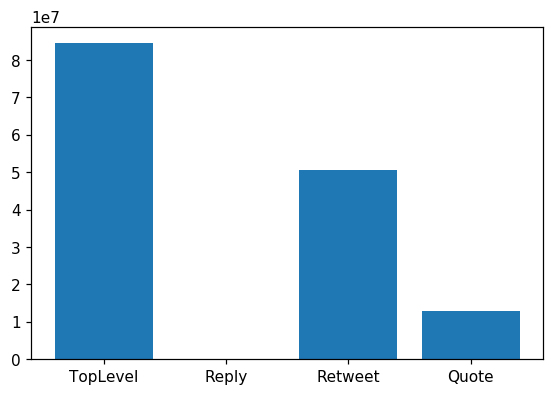

In [30]:
plt.bar(t_types, n_engagements_arr)
plt.show()

POSITIVE


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


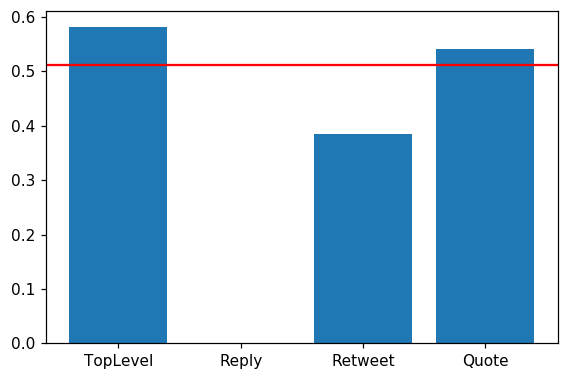

In [31]:
# Positive
print("POSITIVE")
percentage = n_positive_engagements_arr / n_engagements_arr
plt.bar(t_types, percentage)
plt.axhline(n_positive_engagements/n_engagements, color="red")
plt.show()

NEGATIVE


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


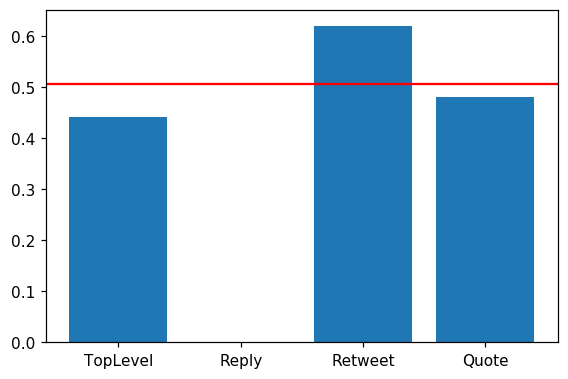

In [32]:
# Negative
print("NEGATIVE")
percentage = n_negative_engagements_arr / n_engagements_arr
plt.bar(t_types, percentage)
plt.axhline(n_negative_engagements/n_engagements, color="red")
plt.show()

LIKE


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


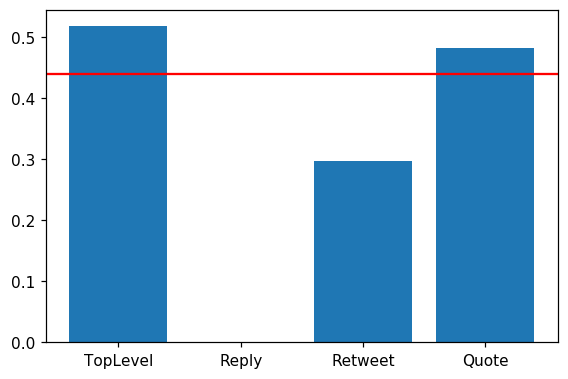

In [33]:
# Like
print("LIKE")
percentage = n_like_engagements_arr / n_engagements_arr
plt.bar(t_types, percentage)
plt.axhline(n_like_engagements/n_engagements, color="red")
plt.show()

RETWEET


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


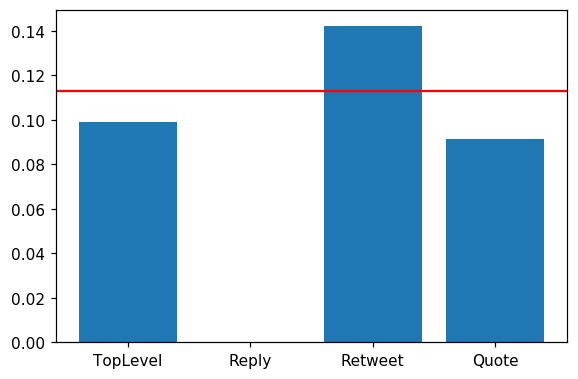

In [34]:
# Retweet
print("RETWEET")
percentage = n_retweet_engagements_arr / n_engagements_arr
plt.bar(t_types, percentage)
plt.axhline(n_retweet_engagements/n_engagements, color="red")
plt.show()

REPLY


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


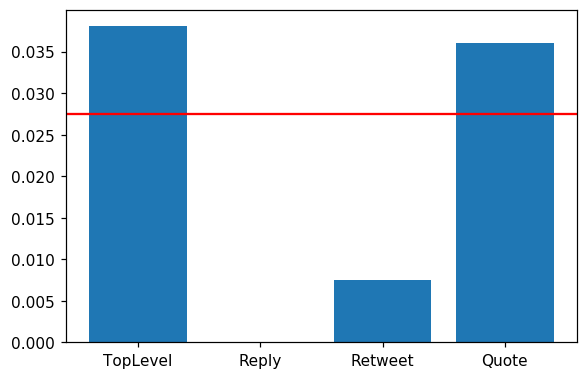

In [35]:
# Reply
print("REPLY")
percentage = n_reply_engagements_arr / n_engagements_arr
plt.bar(t_types, percentage)
plt.axhline(n_reply_engagements/n_engagements, color="red")
plt.show()

COMMENT


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


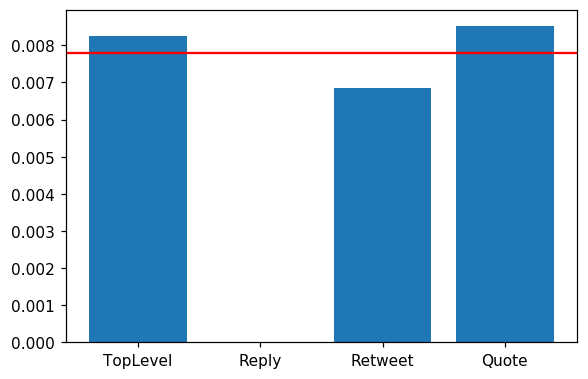

In [36]:
# Comment
print("COMMENT")
percentage = n_comment_engagements_arr / n_engagements_arr
plt.bar(t_types, percentage)
plt.axhline(n_comment_engagements/n_engagements, color="red")
plt.show()